In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [ ]:
This tutorial is covered in shortway using 'Feature-Engine' library in FeatureEngineering Module
Below can be read to understand but for project implementation better to use 'Feature-Engine'library approach.
It's easier. 

# Outlier Detection and Removal using Quantiles Approach

In [30]:
df = pd.read_csv('seaborn-data-master/heights.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    14 non-null     object 
 1   height  14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 352.0+ bytes


In [32]:
df

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
9     imran    14.5
10     jose     6.1
11  deepika     5.6
12   yoseph     1.2
13    binod     5.5

In [33]:
df['height'].quantile()

5.55

In [34]:
df['height'].quantile(0.05)

3.6050000000000004

In [35]:
df['height'].quantile(0.95)

9.689999999999998

In [36]:
# Set the Quantile

min_thresold = df['height'].quantile(0.05)
max_thresold = df['height'].quantile(0.95)

In [37]:
min_thresold

3.6050000000000004

In [38]:
max_thresold

9.689999999999998

In [39]:
# Find the outliers

In [40]:
df[df['height']<min_thresold]

name  height
12  yoseph     1.2

In [41]:
df[df['height']>max_thresold]

name  height
9  imran    14.5

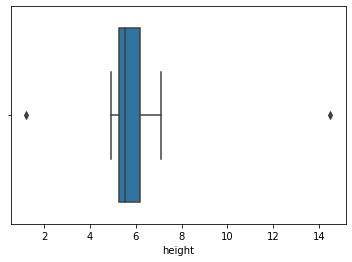

In [42]:
sb.boxplot(df.height)  # same 2 outliers can be easily seen using boxplot. 2 points are very far.

In [23]:
# Remove the Outliers

In [43]:
df2 = df[
    (df['height']>min_thresold) & 
    (df['height']<max_thresold)
]
df2

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
13    binod     5.5

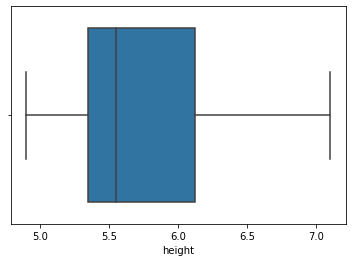

In [44]:
sb.boxplot(df2.height)  # outlier is gone now.

In [45]:
# Another Example - Bangalore House Prices

In [46]:
bhp_df = pd.read_csv('seaborn-data-master/bhp.csv')  

In [47]:
bhp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [48]:
bhp_df.head(5)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [49]:
bhp_df.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

In [51]:
min_thresold, max_thresold = bhp_df.price_per_sqft.quantile([0.001,0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000099)

In [52]:
bhp_df[bhp_df.price_per_sqft<min_thresold].count()

location          14
size              14
total_sqft        14
bath              14
price             14
bhk               14
price_per_sqft    14
dtype: int64

In [53]:
bhp_df[bhp_df.price_per_sqft<min_thresold]

location       size  total_sqft  bath  price  bhk  price_per_sqft
665    Yelahanka      3 BHK     35000.0   3.0  130.0    3             371
798        other  4 Bedroom     10961.0   4.0   80.0    4             729
1867       other  3 Bedroom     52272.0   2.0  140.0    3             267
2392       other  4 Bedroom      2000.0   3.0   25.0    4            1250
3934       other      1 BHK      1500.0   1.0   19.5    1            1300
5343       other      9 BHK     42000.0   8.0  175.0    9             416
5417      Ulsoor      4 BHK     36000.0   4.0  450.0    4            1250
5597    JP Nagar      2 BHK      1100.0   1.0   15.0    2            1363
7166   Yelahanka  1 Bedroom     26136.0   1.0  150.0    1             573
7862    JP Nagar      3 BHK     20000.0   3.0  175.0    3             875
8300     Kengeri      1 BHK      1200.0   1.0   14.0    1            1166
9144       other  4 Bedroom     10961.0   4.0   80.0    4             729
11635      Begur      3 BHK      2400.0   3.0   12.0    3             500
12355      other      4 BHK     16335.0   4.0  149.0    4             912

In [54]:
bhp_df[bhp_df.price_per_sqft < min_thresold].sort_values('price_per_sqft')

location       size  total_sqft  bath  price  bhk  price_per_sqft
1867       other  3 Bedroom     52272.0   2.0  140.0    3             267
665    Yelahanka      3 BHK     35000.0   3.0  130.0    3             371
5343       other      9 BHK     42000.0   8.0  175.0    9             416
11635      Begur      3 BHK      2400.0   3.0   12.0    3             500
7166   Yelahanka  1 Bedroom     26136.0   1.0  150.0    1             573
798        other  4 Bedroom     10961.0   4.0   80.0    4             729
9144       other  4 Bedroom     10961.0   4.0   80.0    4             729
7862    JP Nagar      3 BHK     20000.0   3.0  175.0    3             875
12355      other      4 BHK     16335.0   4.0  149.0    4             912
8300     Kengeri      1 BHK      1200.0   1.0   14.0    1            1166
2392       other  4 Bedroom      2000.0   3.0   25.0    4            1250
5417      Ulsoor      4 BHK     36000.0   4.0  450.0    4            1250
3934       other      1 BHK      1500.0   1.0   19.5    1            1300
5597    JP Nagar      2 BHK      1100.0   1.0   15.0    2            1363

In [55]:
bhp_df[bhp_df.price_per_sqft > max_thresold].sort_values('price_per_sqft')

location       size  total_sqft  bath   price  bhk  \
5911         Mysore Road  1 Bedroom        45.0   1.0    23.0    1   
9436        Indira Nagar  4 Bedroom      2400.0   5.0  1250.0    4   
7799               other      4 BHK      2000.0   3.0  1063.0    4   
8307   Bannerghatta Road      5 BHK      2500.0   4.0  1400.0    5   
12328              other  4 Bedroom      4350.0   8.0  2600.0    4   
6356        Bommenahalli  4 Bedroom      2940.0   3.0  2250.0    4   
7012               other      1 BHK       650.0   1.0   500.0    1   
7575               other      1 BHK       425.0   1.0   750.0    1   
1005               other      1 BHK        15.0   1.0    30.0    1   
11447         Whitefield  4 Bedroom        60.0   4.0   218.0    4   
1106               other  5 Bedroom        24.0   2.0   150.0    5   
345                other  3 Bedroom        11.0   3.0    74.0    3   
4924               other      7 BHK         5.0   7.0   115.0    7   
4044      Sarjapur  Road  4 Bedroom         1.0   4.0   120.0    4   

       price_per_sqft  
5911            51111  
9436            52083  
7799            53150  
8307            56000  
12328           59770  
6356            76530  
7012            76923  
7575           176470  
1005           200000  
11447          363333  
1106           625000  
345            672727  
4924          2300000  
4044         12000000

In [56]:
bhp_df2=bhp_df[(bhp_df.price_per_sqft > min_thresold) & (bhp_df.price_per_sqft < max_thresold)]

# Note: since we want non outliers the symbol is reveresed, please note. 

In [57]:
bhp_df2.info()  # original record count was 13200.  28 records of outliers are removed. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13172 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13172 non-null  object 
 1   size            13172 non-null  object 
 2   total_sqft      13172 non-null  float64
 3   bath            13172 non-null  float64
 4   price           13172 non-null  float64
 5   bhk             13172 non-null  int64  
 6   price_per_sqft  13172 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 823.2+ KB


# Outlier Detection and Removal using STD approach

In [84]:
df = pd.read_csv('seaborn-data-master/heights_2.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [86]:
df.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [87]:
df.describe()

height
count  10000.000000
mean      66.367560
std        3.847528
min       54.263133
25%       63.505620
50%       66.318070
75%       69.174262
max       78.998742

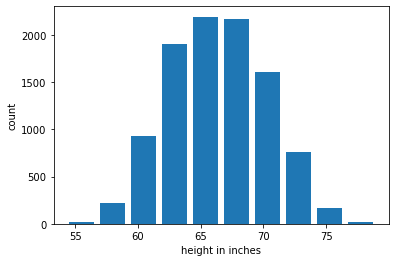

In [92]:
plt.hist(df.height, bins=10, rwidth = 0.8)
plt.xlabel('height in inches')
plt.ylabel('count')
plt.show()

In [93]:
from scipy.stats import norm

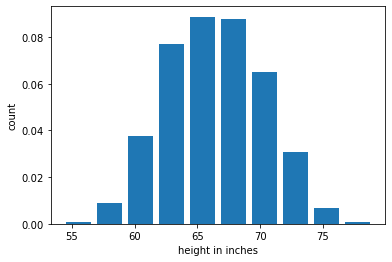

In [94]:
plt.hist(df.height, bins=10, rwidth = 0.8, density= True) # density will make y axis range from 0 to 1
plt.xlabel('height in inches')
plt.ylabel('count')
plt.show()

In [97]:
rng = np.arange(df.height.min(),df.height.max(),0.1)
rng

array([54.26313333, 54.36313333, 54.46313333, 54.56313333, 54.66313333,
       54.76313333, 54.86313333, 54.96313333, 55.06313333, 55.16313333,
       55.26313333, 55.36313333, 55.46313333, 55.56313333, 55.66313333,
       55.76313333, 55.86313333, 55.96313333, 56.06313333, 56.16313333,
       56.26313333, 56.36313333, 56.46313333, 56.56313333, 56.66313333,
       56.76313333, 56.86313333, 56.96313333, 57.06313333, 57.16313333,
       57.26313333, 57.36313333, 57.46313333, 57.56313333, 57.66313333,
       57.76313333, 57.86313333, 57.96313333, 58.06313333, 58.16313333,
       58.26313333, 58.36313333, 58.46313333, 58.56313333, 58.66313333,
       58.76313333, 58.86313333, 58.96313333, 59.06313333, 59.16313333,
       59.26313333, 59.36313333, 59.46313333, 59.56313333, 59.66313333,
       59.76313333, 59.86313333, 59.96313333, 60.06313333, 60.16313333,
       60.26313333, 60.36313333, 60.46313333, 60.56313333, 60.66313333,
       60.76313333, 60.86313333, 60.96313333, 61.06313333, 61.16

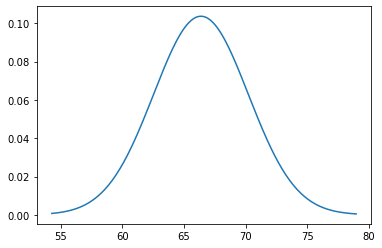

In [98]:
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

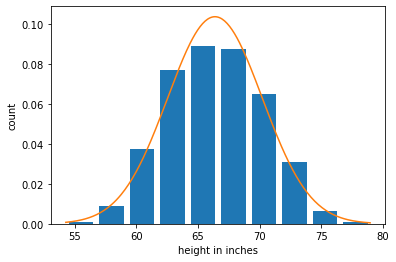

In [99]:
plt.hist(df.height, bins=10, rwidth = 0.8, density= True) # density will make y axis range from 0 to 1
plt.xlabel('height in inches')
plt.ylabel('count')
rng = np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))
plt.show()

In [100]:
df.height.mean()

66.3675597548656

In [101]:
df.height.std()

3.847528120795573

In [102]:
upper_limit = df.height.mean() + 3* (df.height.std()) # 3 times of std
upper_limit

77.91014411725232

In [103]:
lower_limit = df.height.mean() - 3* (df.height.std()) # 3 times of std
lower_limit

54.824975392478876

In [105]:
df[df.height > upper_limit] # these are outliers which are > than 3 times of std 

gender     height
994    Male  78.095867
1317   Male  78.462053
2014   Male  78.998742
3285   Male  78.528210
3757   Male  78.621374

In [107]:
df[df.height < lower_limit] # these are outliers which are < than 3 times of std 

gender     height
6624  Female  54.616858
9285  Female  54.263133

In [114]:
# to see all outliers together 

df[(df.height < lower_limit) | (df.height > upper_limit)]   # OR condition is used. 

gender     height
994     Male  78.095867
1317    Male  78.462053
2014    Male  78.998742
3285    Male  78.528210
3757    Male  78.621374
6624  Female  54.616858
9285  Female  54.263133

In [115]:
# to create new df by removing the outliers

df2 = df[(df.height > lower_limit) & (df.height < upper_limit)]  # AND condition is used. 

In [116]:
df2

gender     height
0       Male  73.847017
1       Male  68.781904
2       Male  74.110105
3       Male  71.730978
4       Male  69.881796
...      ...        ...
9995  Female  66.172652
9996  Female  67.067155
9997  Female  63.867992
9998  Female  69.034243
9999  Female  61.944246

[9993 rows x 2 columns]

In [117]:
df2.describe()  # 7 rows of outlier are removed. 

height
count  9993.000000
mean     66.363856
std       3.835511
min      54.873728
25%      63.505894
50%      66.317755
75%      69.169353
max      77.547186

# Outlier Detection and Removal using Z Score approach

In [118]:
# reload the same file again

df = pd.read_csv('seaborn-data-master/heights_2.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [121]:
# add z-score column to DF and calculate it. 

df['zscore'] = (df.height-df.height.mean())/df.height.std()

In [122]:
df.head()

gender     height    zscore
0   Male  73.847017  1.943964
1   Male  68.781904  0.627505
2   Male  74.110105  2.012343
3   Male  71.730978  1.393991
4   Male  69.881796  0.913375

In [125]:
df[df.zscore < -3] # these are outliers since it's zscore is < -3

gender     height    zscore
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027

In [124]:
df[df.zscore > 3]  # these are outliers since it's zscore is > 3

gender     height    zscore
994    Male  78.095867  3.048271
1317   Male  78.462053  3.143445
2014   Male  78.998742  3.282934
3285   Male  78.528210  3.160640
3757   Male  78.621374  3.184854

In [130]:
df[ (df.zscore < -3) | (df.zscore > 3) ]  # All outliers

gender     height    zscore
994     Male  78.095867  3.048271
1317    Male  78.462053  3.143445
2014    Male  78.998742  3.282934
3285    Male  78.528210  3.160640
3757    Male  78.621374  3.184854
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027

In [131]:
# create new data set excluding outliers

df2 = df[ (df.zscore > -3) & (df.zscore < 3) ]

In [132]:
df2.info()    # 7 outliers are removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  9993 non-null   object 
 1   height  9993 non-null   float64
 2   zscore  9993 non-null   float64
dtypes: float64(2), object(1)
memory usage: 312.3+ KB


# Outlier detection and removal using IQR approach

In [137]:
df = pd.read_csv('seaborn-data-master/heights_3.csv')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    20 non-null     object 
 1   height  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [139]:
df.describe()

height
count  20.000000
mean    8.390000
std     8.782812
min     1.200000
25%     5.350000
50%     5.700000
75%     6.275000
max    40.200000

In [140]:
 df

name  height
0     mohan     1.2
1     maria     2.3
2     sakib     4.9
3       tao     5.1
4     virat     5.2
5    khusbu     5.4
6    dmitry     5.5
7    selena     5.5
8      john     5.6
9     imran     5.6
10     jose     5.8
11  deepika     5.9
12   yoseph     6.0
13    binod     6.1
14  gulshan     6.2
15  johnson     6.5
16   donald     7.1
17    aamir    14.5
18      ken    23.2
19      Liu    40.2

In [147]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1,Q3

(5.3500000000000005, 6.275)

In [148]:
IQR = Q3-Q1
IQR

0.9249999999999998

In [149]:
lowerlimit = Q1 - 1.5*IQR
upperlimit = Q3 + 1.5*IQR
lowerlimit, upperlimit

(3.962500000000001, 7.6625)

In [155]:
df[ (df.height < lowerlimit) | (df.height > upperlimit) ] # these are outliers

name  height
0   mohan     1.2
1   maria     2.3
17  aamir    14.5
18    ken    23.2
19    Liu    40.2

In [156]:
df2 = df[ (df.height > lowerlimit) & (df.height < upperlimit) ]  # new DF by excluding outliers

In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    15 non-null     object 
 1   height  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 360.0+ bytes


In [161]:
df2.sort_values('height')

name  height
2     sakib     4.9
3       tao     5.1
4     virat     5.2
5    khusbu     5.4
6    dmitry     5.5
7    selena     5.5
8      john     5.6
9     imran     5.6
10     jose     5.8
11  deepika     5.9
12   yoseph     6.0
13    binod     6.1
14  gulshan     6.2
15  johnson     6.5
16   donald     7.1